<br><br><br>
## CS 429: Information Retrieval

<br>

### Prof. Aron Culotta
### Illinois Institute of Technology 


<br><br><br><br><br><br><br><br>
---


# What is Information Retrieval?

<br><br><br><br>
---

# Examples of Information Retrieval

<a href="http://google.com"><img src="https://www.google.com/images/srpr/logo11w.png" width="20%"></a>
<a href="http://apple.com"><img src="http://www.fatdex.net/php/wp-content/uploads/2008/11/3_osx_spotlight.jpg" width="30%"></a>
<img src="http://marketingchristianbooks.files.wordpress.com/2010/03/librarian.png" width="20%">
<a href="http://soundhound.com"><img src="http://a1.mzstatic.com/us/r30/Purple4/v4/04/f6/17/04f6170a-a577-dcc2-c554-b36076b8fe82/mzl.gqblbiin.png" width="20%"></a>
<a href="http://youtube.com"><img src="https://developers.google.com/youtube/images/YouTube_logo_standard_white.png" width="20%"></a>
<a href="http://eharmony.com"><img src="http://static3.businessinsider.com/image/4c91323c7f8b9a9a40e60300-1200/20-eharmony.jpg" width="30%"></a>
<a href="http://ciir-publications.cs.umass.edu/pub/web/getpdf.php?id=1066"><img src="files/goldberg.png" width="30%"></a>

**information retrieval:** 
  *the process of finding relevant data.*


Typically:

- text, though also images, video, audio


- *unstructured* (in contrast to relational databases)


- using a computer 

# Architecture

   ![arch](files/arch.png)
   
   <br><br><br>


# Simplest information retrieval problem


In [70]:
documents = ['dog', 'cat', 'zebra', 'cat']




In [ ]:
def search(documents, query):
    return [doc for doc in documents if doc == query]


def search2(documents, query):
    results = []
    for doc in documents:
        if doc == query:
            results.append(doc)
    return results


In [71]:
print(search(documents, 'cat'))





['cat', 'cat']


Worst-case runtime?

$T(n) = O(n)$ , where $n=$`len(documents)`.    **Can we do better?**

# Most documents have more than one word...

In [72]:
documents = [['dog', 'cat'], ['cat', 'zebra'], ['dog', 'puma']]





In [73]:
def search(documents, query):
    return [doc for doc in documents if query in doc]





In [74]:
print(search(documents, 'cat'))





[['dog', 'cat'], ['cat', 'zebra']]


Runtime?

Naive: $O(n*m)$ , where $n=$ `len(documents)` and $m=$ `max(len(d) for d in documents)`

# Inverted Index

Map from *word* $\rightarrow$ *Postings List*

**Postings List:** List of ids for documents containing the word.

In [75]:
# Map each word to the list of indices of documents that contain it.
index = {'dog': [0, 2],
         'cat': [0, 1],  # IDs are sorted. Why?
         'zebra': [1],
         'puma': [2]}


# Recall: 
# documents = [['dog', 'cat'], ['cat', 'zebra'], ['dog', 'puma']]



In [76]:
print(index['dog'])





[0, 2]


In [77]:
# Python tip: dir() will list all attributes/methods of a variable.
dir(index)





['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [78]:
# Python tip: help() will list
# documentation for variable/method.
help(index)





Help on dict object:

class dict(object)
 |  dict() -> new empty dictionary
 |  dict(mapping) -> new dictionary initialized from a mapping object's
 |      (key, value) pairs
 |  dict(iterable) -> new dictionary initialized as if via:
 |      d = {}
 |      for k, v in iterable:
 |          d[k] = v
 |  dict(**kwargs) -> new dictionary initialized with the name=value pairs
 |      in the keyword argument list.  For example:  dict(one=1, two=2)
 |  
 |  Methods defined here:
 |  
 |  __contains__(self, key, /)
 |      True if D has a key k, else False.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize s

Most important Python data structures to know:
- list
- set
- tuple
- dict
- Counter

In [79]:
def indexed_search(documents, index, query):
    return [documents[doc_id] for doc_id in index[query]]





In [80]:
print(indexed_search(documents, index, 'cat'))





[['dog', 'cat'], ['cat', 'zebra']]


**Runtime?**  


$O(k)$ , where $k$ is number of matching documents.

# Building an Index


![index2](files/index2.png)

(Source: MRS)

# Query Processing

Most queries have more than one word:

**dog** AND **cat**

** Index:**
<br>
*dog* $\rightarrow \{0, 2\}$
<br>
*cat* $\rightarrow  \{0, 1\}$

In [81]:
def and_search(documents, index, queries):
    doc_ids = set(index[queries[0]])
    for query in queries[1:]: # For remaining words in query
        doc_ids &= set(index[query]) # Set intersection
    return [documents[doc_id] for doc_id in doc_ids]





In [82]:
print(and_search(documents, index, ['cat', 'dog']))





[['dog', 'cat']]


**Runtime?**

Depends on set intersection computation.

# Merging Postings Lists

*dog* $\rightarrow \{0, 2, 4, 11, 31, 45, 173, 174\}$
<br>
*cat* $\rightarrow \{2, 31, 54, 101\}$

Intersection $\rightarrow \{2, 31\}$

**Idea**: maintain pointers to both lists and walk through both simultaneously

Running time: $O(x + y)$ , where $x$ and $y$ are lengths of two postings lists

# Query Optimization

Organize query processing efficiently.

*dog* $\rightarrow \{0, 2, 4, 11, 31, 45, 173, 174\}$
<br>
*cat* $\rightarrow \{2, 31, 54, 101\}$
<br>
*zebra* $\rightarrow \{31, 506\}$

**dog** AND **cat** AND **zebra**

Which order?

1. (**dog** AND **cat**) AND **zebra**
2. **dog** AND (**cat** AND **zebra**)
3. (**dog** AND **zebra**) AND **cat**

\#2 reduces work by processing rare words first.



What about **dog** AND NOT **cat**?

# Survey results

In [83]:
# survey.txt contains tab-separated survey results.
survey = [line.strip().split('\t') for line in open('survey.txt')]
survey[0]





['Timestamp',
 'First Name',
 'Last Name',
 'IIT Email Address',
 'CWID (A#)',
 "GitHub Username (Please create a new account at http://github.com if you don't already have one.)",
 'How familiar are you with version control? (git, svn, mercurial, cvs, etc.)',
 'How familiar are you with Python?',
 'Have you taken a course on Machine Learning or Data Mining?',
 'Why are you taking this course?']

In [84]:
import matplotlib.pyplot as plt # a plotting library
# iPython "magic" command. print plots in notebook, instead of a new window.
% matplotlib inline  
from collections import Counter  # A dict for counting.

def plot_results_for_column(survey, colidx):
    counts = Counter(row[colidx] for row in survey[1:])
    keys = sorted(counts.keys())
    plt.figure()
    plt.bar(range(len(keys)), [counts[k] for k in keys], width=.5)
    plt.xticks(range(len(counts)), keys)
    plt.title(survey[0][colidx])
    plt.xlabel('count')
    plt.ylabel('frequency')
    plt.show()
    




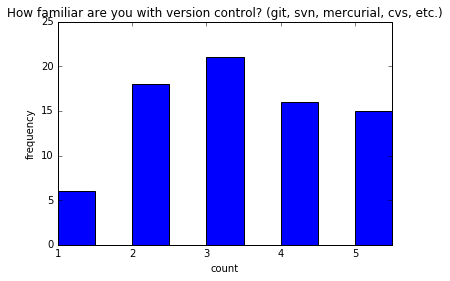

In [85]:
plot_results_for_column(survey, 6)





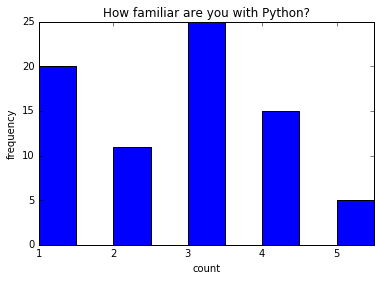

In [86]:
plot_results_for_column(survey, 7)





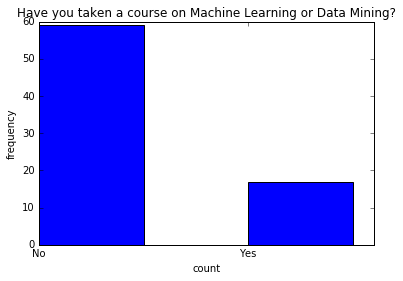

In [87]:
plot_results_for_column(survey, 8)





In [88]:
# Count terms in responses to "Why are you taking this course?"
term_counts = Counter()
for row in survey:
    term_counts.update(row[9].lower().split())
term_counts.most_common(20)





[('to', 54),
 ('and', 42),
 ('i', 37),
 ('in', 25),
 ('learn', 21),
 ('it', 18),
 ('the', 17),
 ('my', 17),
 ('about', 15),
 ('search', 15),
 ('data', 14),
 ('this', 14),
 ('a', 12),
 ('like', 12),
 ('interesting', 12),
 ('of', 12),
 ('interested', 11),
 ('want', 11),
 ('is', 10),
 ('retrieval', 10)]

In [89]:
# Count 2-word phrases (bigrams) in responses to "Why are you taking this course?"
term_counts = Counter()
for row in survey:
    words = row[9].lower().split()
    term_counts.update(zip(words[:-1], words[1:]))
term_counts.most_common(20)





[(('to', 'learn'), 19),
 (('want', 'to'), 11),
 (('interested', 'in'), 10),
 (('learn', 'about'), 8),
 (('search', 'engine'), 8),
 (('information', 'retrieval'), 6),
 (('like', 'to'), 6),
 (('i', 'want'), 6),
 (('learn', 'more'), 5),
 (('data', 'mining'), 5),
 (('i', 'am'), 5),
 (('this', 'course'), 5),
 (('in', 'the'), 4),
 (('i', 'would'), 4),
 (('to', 'take'), 4),
 (('in', 'my'), 4),
 (('would', 'like'), 4),
 (('about', 'data'), 4),
 (('more', 'about'), 4),
 (('and', 'i'), 4)]

# Course Information

- **GitHub** will be primary source of course information.
  - <https://github.com/iit-cs429/main>
- Assignments turned in to GitHub
- Quizzes done on Blackboard.
- Let's look at the [syllabus](https://github.com/iit-cs429/main/blob/master/README.md), [schedule](https://github.com/iit-cs429/main/blob/master/Schedule.md), and [first assignment](https://github.com/iit-cs429/assignments/).